<hr style="height:10px"> 
 
<div class='container2'>
    <h1>Churn dataset</h1>
    <h4> <a href="https://www.linkedin.com/in/jdlamosa/">Jéssica Domingues Lamosa</a>
    </div>
</div>




  
<h2>Introduction</h2>

 <hr style="height:0.5px"> 


Definition: Churn means turnover, movement, and for this reason, the churn rate is also called “turnover rate” or “attrition rate”. The more you know about it and are prepared to deal with it, the easier it will be to minimize its negative impacts. It is important to identify the causes of churn!
Minimize your negative impact: The best way to get out of this kind of situation is to follow your customers closely and understand how satisfied they are with your company. 
Nobody can predict exactly how many people will stop being your customers, but having the numbers at hand helps when analyzing and taking the necessary precautions.

Create strategies to correct it: look at the data and create a strategy to reverse the situation.
In general, the lower the churn, the easier it is to promote the upsell, as customers are becoming loyal to the brand.

---

## Resources

For this notebook, Python 3.5 or higher must be used with the following libraries, which must be installed:

* [`matplotlib`](https://matplotlib.org/) (version 3.1.3 or higher): construction and display of graphics
* [`seaborn`](https://seaborn.pydata.org/) (version 0.10.0 or higher): construction and display of graphics
* [`numpy`](https://numpy.org) (version 1.16.2 or higher): data manipulation in vector and matrix format
* [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html) (version 0.24.1 or higher): data manipulation in table format
* [`Scikit learn`](https://scikit-learn.org/stable/) (version 0.22.1 or higher): set of methods and templates useful for Machine Learning and Artificial Intelligence
* [`yellowbrick`](https://www.scikit-yb.org/en/latest/api/model_selection/importances.html) (version 1.3): Feature engineering process 

The datasets provided with this *notebook* will also be used, which is located in the which is located in the `datasets` directory, in the [`.csv`](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv) file format.

---
### Loading libraries

First, let's import all the libraries that will be used.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from yellowbrick.model_selection import FeatureImportances

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

print('Loaded libraries!')

Loaded libraries!


---
### Loading data

In [2]:
df_dataset = pd.read_csv('dataset/ChurnData.csv')
print(df_dataset.shape)
df_dataset.head()

(200, 28)


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


---
## Data analysis and preparation

### Preprocessing: attributes with missing values

An important step is to check if there are attributes with missing values (*NaN*) in the database.
* If it returns 0 there are no values with NaN
* Otherwise it is necessary to deal the missing data

In [3]:
df_dataset.isnull().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

### Checking the data type

In [4]:
print(df_dataset.dtypes)

tenure      float64
age         float64
address     float64
income      float64
ed          float64
employ      float64
equip       float64
callcard    float64
wireless    float64
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
cardten     float64
voice       float64
pager       float64
internet    float64
callwait    float64
confer      float64
ebill       float64
loglong     float64
logtoll     float64
lninc       float64
custcat     float64
churn       float64
dtype: object


### Statistics

Now, let's generate some statistics about the database.

The `describe()` function of `Pandas` summarizes the main statistics about the data in a *data frame*, such as the mean, standard deviation, maximum value, minimum value and some percentiles.

In [5]:
df_dataset.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


### describe() for churn = 0

In [6]:
df_dataset[df_dataset['churn']==0.0].describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.0
mean,40.704225,43.563380,13.338028,82.563380,2.647887,12.154930,0.338028,0.795775,0.239437,13.629930,...,0.239437,0.359155,0.471831,0.485915,0.359155,2.350331,3.241754,4.007366,2.464789,0.0
std,21.011239,13.394433,10.702215,147.848948,1.250232,9.324942,0.474713,0.404561,0.428250,10.748772,...,0.428250,0.481451,0.500973,0.501571,0.481451,0.730093,0.246003,0.794891,1.001148,0.0
min,3.000000,20.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.588000,2.251000,2.197000,1.000000,0.0
25%,23.250000,34.000000,4.000000,31.500000,2.000000,5.000000,0.000000,1.000000,0.000000,6.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.872000,3.240000,3.449750,2.000000,0.0
50%,42.000000,42.500000,10.500000,50.500000,2.500000,10.500000,0.000000,1.000000,0.000000,10.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.351000,3.240000,3.922000,2.000000,0.0
75%,59.750000,53.000000,21.000000,92.000000,4.000000,19.000000,1.000000,1.000000,0.000000,17.150000,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.842000,3.240000,4.522000,3.000000,0.0
max,72.000000,76.000000,48.000000,1668.000000,5.000000,44.000000,1.000000,1.000000,1.000000,62.300000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,0.0


### describe() churn = 1

In [7]:
df_dataset[df_dataset['churn']==1.0].describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,...,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.0
mean,22.775862,35.293103,7.517241,56.931034,3.258621,5.500000,0.637931,0.482759,0.413793,7.282759,...,0.362069,0.637931,0.413793,0.396552,0.637931,1.808793,3.198414,3.813052,2.500000,1.0
std,17.628767,10.187727,7.243246,55.117693,1.278161,5.746853,0.484796,0.504067,0.496814,5.137056,...,0.484796,0.484796,0.496814,0.493454,0.484796,0.580157,0.353058,0.622032,1.260047,0.0
min,1.000000,19.000000,0.000000,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.095000,1.749000,2.833000,1.000000,1.0
25%,10.000000,28.250000,2.000000,31.500000,2.000000,2.000000,0.000000,0.000000,0.000000,4.150000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.423000,3.168000,3.449750,1.000000,1.0
50%,17.000000,33.000000,6.000000,42.000000,4.000000,4.000000,1.000000,0.000000,0.000000,5.925000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.779000,3.240000,3.737500,2.000000,1.0
75%,33.000000,41.750000,12.000000,63.750000,4.000000,7.000000,1.000000,1.000000,1.000000,8.300000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.116000,3.240000,4.155000,4.000000,1.0
max,61.000000,63.000000,33.000000,398.000000,5.000000,33.000000,1.000000,1.000000,1.000000,29.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.374000,4.073000,5.986000,4.000000,1.0


## Pre-processing: normalization of attributes

We can observe the difference between the mean of the features. So, it is necessary to normalize the attribute values. We can use MinMaxScaler or StandardScaler function, here I will use the StandardScaler.

* Min-max normalization is one of the most common ways to normalize, this estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one. 
* StandardScaler typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance)



In [8]:
scaler = preprocessing.StandardScaler().fit(df_dataset.iloc[:,0:-1])
df_dataset.iloc[:,0:-1] = scaler.transform(df_dataset.iloc[:,0:-1])
df_details = df_dataset.describe()
display(df_details.round(8))

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.290000
std,1.002509,1.002509,1.002509,1.002509,1.002509,1.002509,1.002509,1.002509,1.002509,1.002509,...,1.002509,1.002509,1.002509,1.002509,1.002509,1.002509,1.002509,1.002509,1.002509,0.454901
min,-1.598430,-1.699240,-1.149710,-0.516201,-1.423189,-1.144375,-0.859727,-1.545908,-0.639101,-1.083828,...,-0.615882,-0.886405,-0.913708,-0.922958,-0.886405,-2.876525,-5.280423,-2.336603,-1.369872,0.000000
25%,-0.868818,-0.779281,-0.853647,-0.344472,-0.643359,-0.808617,-0.859727,-1.545908,-0.639101,-0.633891,...,-0.615882,-0.886405,-0.913708,-0.922958,-0.886405,-0.660133,-0.009578,-0.688739,-0.441145,0.000000
50%,-0.092881,-0.089313,-0.261522,-0.211773,0.136470,-0.304980,-0.859727,0.646869,-0.639101,-0.358859,...,-0.615882,-0.886405,-0.913708,-0.922958,-0.886405,-0.114175,0.038582,-0.106592,-0.441145,0.000000
75%,0.914679,0.753982,0.626666,0.038015,0.916299,0.758253,1.163160,0.646869,1.564697,0.254575,...,1.623688,1.128152,1.094442,1.083473,1.128152,0.639817,0.038582,0.574135,0.487582,1.000000
max,1.690616,2.670562,3.587292,12.433710,1.696129,3.780075,1.163160,0.646869,1.564697,5.121495,...,1.623688,1.128152,1.094442,1.083473,1.128152,2.657772,3.559613,4.619860,1.416309,1.000000


## Data Visualization
* using the `pairplot` function from `seaborn`. 

In [9]:
#sns.pairplot(df_dataset, hue='churn', diag_kind='kde')
#plt.show()

0.0    142
1.0     58
Name: churn, dtype: int64

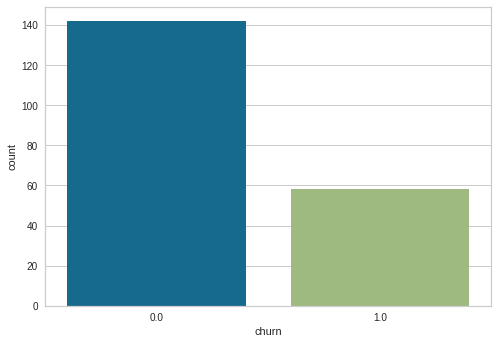

In [10]:
display( df_dataset['churn'].value_counts() )

sns.countplot(x="churn", data=df_dataset)

plt.show()

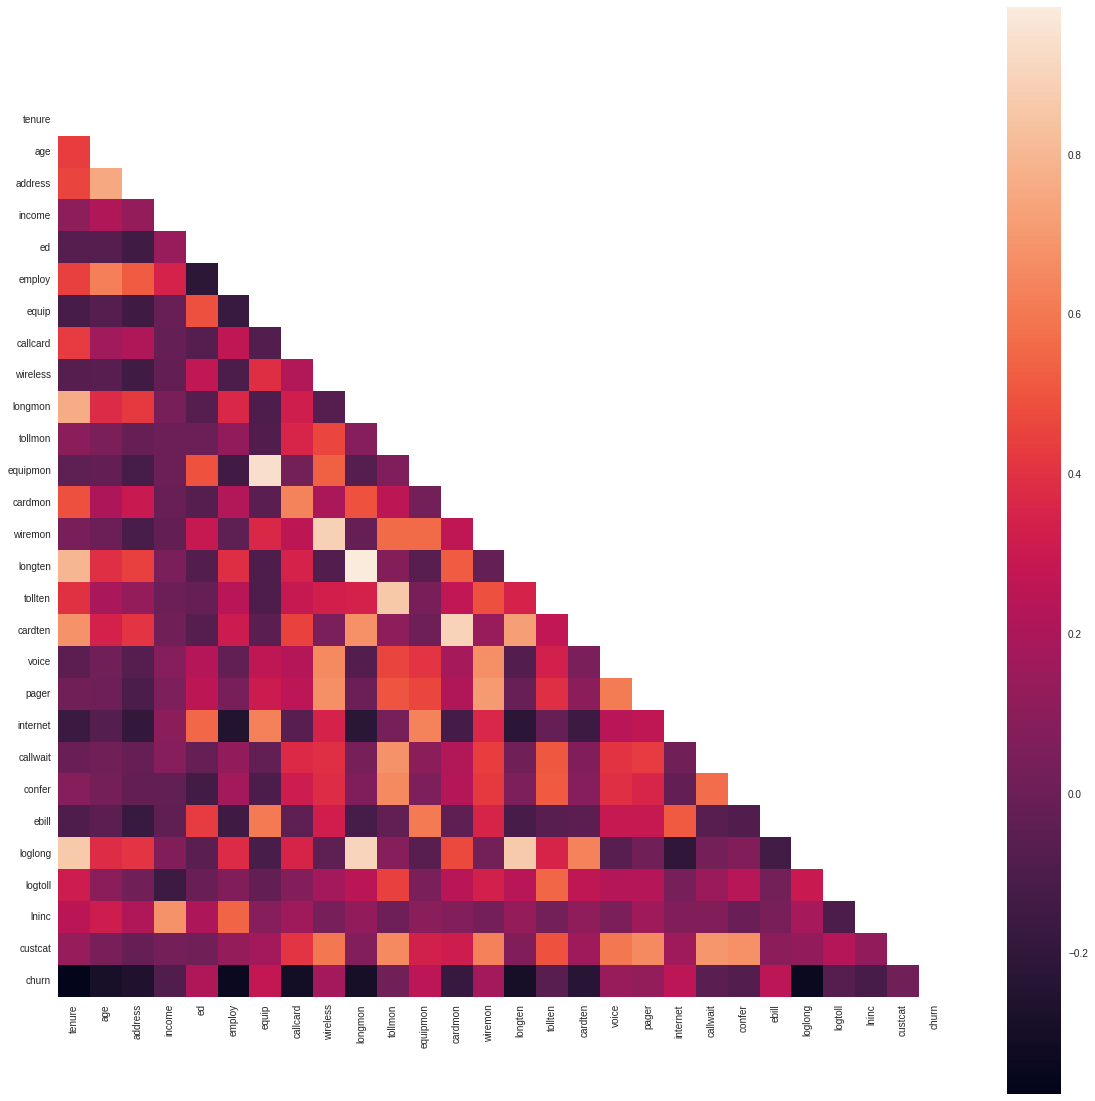

In [11]:
corr = df_dataset.corr(method ='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask, square=True)

In [12]:
df_dataset.corr(method ='pearson').abs().sort_values(by = 'churn', ascending=False).head(n=10)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
churn,0.376860,0.287697,0.260659,0.090790,0.216112,0.337969,0.275284,0.311451,0.174356,0.292026,...,0.124623,0.254838,0.052885,0.081361,0.254838,0.336869,0.070156,0.117459,0.014839,1.000000
tenure,1.000000,0.431802,0.456328,0.109383,0.070503,0.445755,0.117102,0.426530,0.070590,0.763134,...,0.018791,0.164921,0.009747,0.080650,0.099128,0.864388,0.310045,0.246353,0.134237,0.376860
employ,0.445755,0.622553,0.520926,0.345161,0.213886,1.000000,0.174470,0.266612,0.101187,0.363386,...,0.038381,0.250044,0.119708,0.173247,0.151965,0.377186,0.068718,0.540052,0.131292,0.337969
loglong,0.864388,0.379413,0.409357,0.065595,0.054581,0.377186,0.113065,0.351030,0.042637,0.901631,...,0.015771,0.202230,0.028577,0.067662,0.133310,1.000000,0.297260,0.182414,0.120468,0.336869
callcard,0.426530,0.170404,0.209204,0.019969,0.071178,0.266612,0.087051,1.000000,0.220118,0.322514,...,0.251069,0.067146,0.370878,0.311056,0.045058,0.351030,0.080060,0.156920,0.407553,0.311451
longten,0.796355,0.393370,0.447256,0.048374,0.083032,0.385254,0.098271,0.342553,0.088461,0.984808,...,0.011369,0.217916,0.013932,0.058190,0.119885,0.862646,0.243419,0.133208,0.068060,0.294906
longmon,0.763134,0.373547,0.421782,0.041808,0.072735,0.363386,0.097618,0.322514,0.073043,1.000000,...,0.001372,0.223929,0.032913,0.060614,0.124605,0.901631,0.247302,0.122550,0.072519,0.292026
age,0.431802,1.000000,0.746566,0.211275,0.071509,0.622553,0.071357,0.170404,0.065527,0.373547,...,0.006803,0.078395,0.020002,0.030625,0.048279,0.379413,0.093600,0.313359,0.041055,0.287697
equip,0.117102,0.071357,0.148977,0.010741,0.488041,0.174470,1.000000,0.087051,0.386735,0.097618,...,0.308633,0.623509,0.034021,0.103499,0.603133,0.113065,0.027882,0.083494,0.174955,0.275284
address,0.456328,0.746566,1.000000,0.132807,0.145550,0.520926,0.148977,0.209204,0.146478,0.421782,...,0.105812,0.191058,0.019967,0.030494,0.172171,0.409357,0.018386,0.212929,0.016841,0.260659


In [13]:
df_dataset.corr(method ='pearson').abs().sort_values(by = 'tenure', ascending=False).head(n=10)


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
tenure,1.000000,0.431802,0.456328,0.109383,0.070503,0.445755,0.117102,0.426530,0.070590,0.763134,...,0.018791,0.164921,0.009747,0.080650,0.099128,0.864388,0.310045,0.246353,0.134237,0.376860
loglong,0.864388,0.379413,0.409357,0.065595,0.054581,0.377186,0.113065,0.351030,0.042637,0.901631,...,0.015771,0.202230,0.028577,0.067662,0.133310,1.000000,0.297260,0.182414,0.120468,0.336869
longten,0.796355,0.393370,0.447256,0.048374,0.083032,0.385254,0.098271,0.342553,0.088461,0.984808,...,0.011369,0.217916,0.013932,0.058190,0.119885,0.862646,0.243419,0.133208,0.068060,0.294906
longmon,0.763134,0.373547,0.421782,0.041808,0.072735,0.363386,0.097618,0.322514,0.073043,1.000000,...,0.001372,0.223929,0.032913,0.060614,0.124605,0.901631,0.247302,0.122550,0.072519,0.292026
cardten,0.676920,0.336903,0.406964,0.019358,0.069499,0.309183,0.053837,0.448182,0.047773,0.673179,...,0.097579,0.154030,0.065429,0.084221,0.051008,0.629907,0.266098,0.114908,0.163888,0.228634
cardmon,0.489857,0.203202,0.297395,0.013513,0.070990,0.219413,0.056590,0.629955,0.195387,0.493439,...,0.216653,0.129166,0.222755,0.232357,0.036768,0.467535,0.240991,0.073435,0.310353,0.177163
address,0.456328,0.746566,1.000000,0.132807,0.145550,0.520926,0.148977,0.209204,0.146478,0.421782,...,0.105812,0.191058,0.019967,0.030494,0.172171,0.409357,0.018386,0.212929,0.016841,0.260659
employ,0.445755,0.622553,0.520926,0.345161,0.213886,1.000000,0.174470,0.266612,0.101187,0.363386,...,0.038381,0.250044,0.119708,0.173247,0.151965,0.377186,0.068718,0.540052,0.131292,0.337969
age,0.431802,1.000000,0.746566,0.211275,0.071509,0.622553,0.071357,0.170404,0.065527,0.373547,...,0.006803,0.078395,0.020002,0.030625,0.048279,0.379413,0.093600,0.313359,0.041055,0.287697
callcard,0.426530,0.170404,0.209204,0.019969,0.071178,0.266612,0.087051,1.000000,0.220118,0.322514,...,0.251069,0.067146,0.370878,0.311056,0.045058,0.351030,0.080060,0.156920,0.407553,0.311451


### Selecting the features:
Checking the highest correlations between a variable and the churn, then between variables, the chosen features were:

In [14]:
features = ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip','churn']
df = df_dataset[features].copy()

In [15]:
df.head()

,tenure,age,address,income,ed,employ,equip,churn
0,-1.135184,-0.625955,-0.458897,0.475142,1.696129,-0.584778,-0.859727,1.0
1,-0.116043,-0.625955,0.034541,-0.328861,-0.643359,-1.144375,-0.859727,1.0
2,-0.579289,-0.855944,-0.261522,-0.352278,-1.423189,-0.920536,-0.859727,0.0
3,0.115580,-0.472629,-0.656272,0.006791,-0.643359,-0.025182,1.163160,0.0
4,-1.320483,-0.472629,0.231916,0.038015,-0.643359,0.534415,-0.859727,0.0


---
# Model

## x/y

#### Get the values of the n-1 first columns and store them in a matrix 

In [16]:
X = df.iloc[:, 0:-1].values

#### Get the values from the last column and store them in a vector

In [17]:
y = df['churn'].values

#### Seed to reproduce the experiment

In [18]:
np.random.seed(1)
randomSeed = 1 

### Data Split 80/20

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


## Modeling and Training

In [20]:
lr_model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

### Prediction and Probability

In [21]:
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:, 1]

### Classification report

In [22]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        28
         1.0       0.75      0.75      0.75        12

    accuracy                           0.85        40
   macro avg       0.82      0.82      0.82        40
weighted avg       0.85      0.85      0.85        40



### Compute confusion matrix

In [23]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)

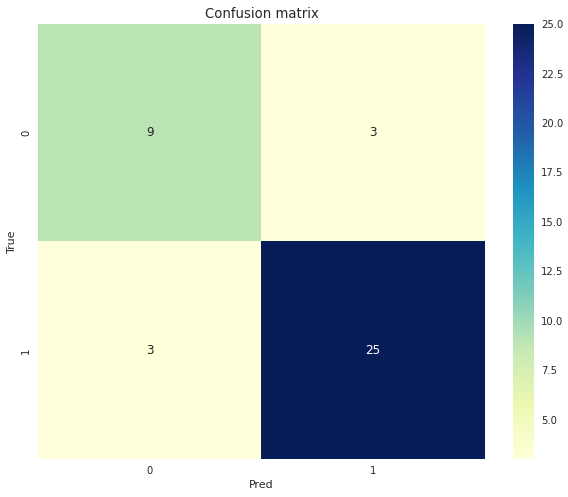

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(cnf_matrix,cmap="YlGnBu", annot=True)
sns.set(font_scale=1.1)
        
plt.xlabel('Pred')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

In [31]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 9
False Positives: 3
True Negatives: 25
False Negatives: 3


### ROC/AUC

To evaluate the performance of a classifier, one can measure the fraction of the total area that fits the ROC curve (AUC). AUC ranges between 0 and +1. Larger AUC values generally indicate better classifier performance [8].

In [25]:
def get_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]

roc_values = []
for thresh in np.linspace(0, 1, 100):
    preds = get_preds(thresh, y_proba)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

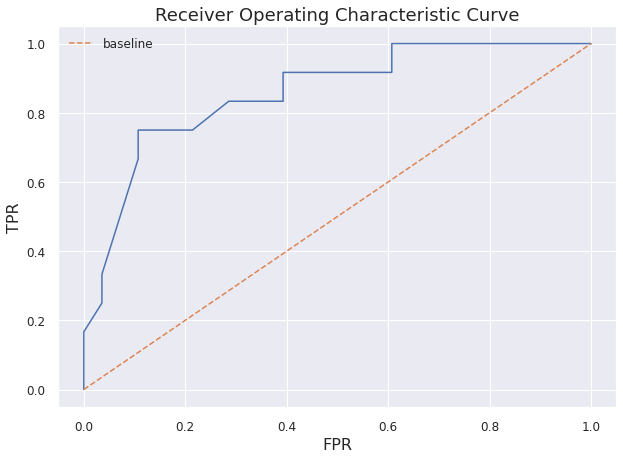

In [26]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);

In [27]:
roc_auc_score(y_test, y_pred)

0.8214285714285714

### Feature Importances:
The Yellowbrick FeatureImportances visualizer utilizes this attribute to rank and plot relative importances.

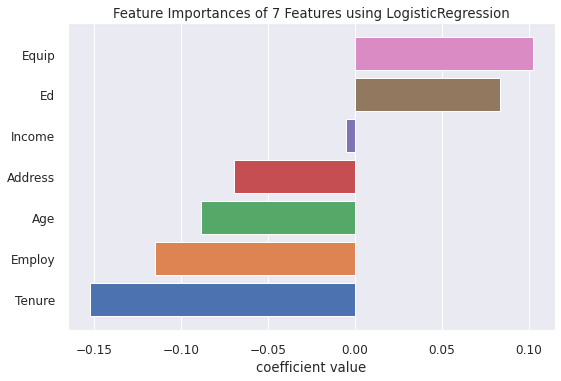

<AxesSubplot:title={'center':'Feature Importances of 7 Features using LogisticRegression'}, xlabel='coefficient value'>

In [28]:
labels = list(map(lambda s: s.title(), df.columns))
viz = FeatureImportances(lr_model, labels=labels, stack=False, relative=False)
viz.fit(X, y)
viz.show()

#### Using topn=3, we can identify the three most informative features

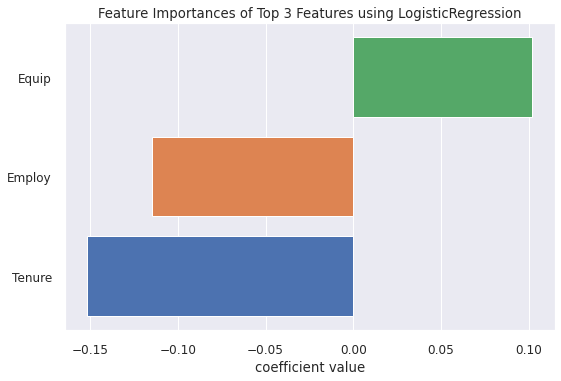

<AxesSubplot:title={'center':'Feature Importances of Top 3 Features using LogisticRegression'}, xlabel='coefficient value'>

In [29]:
viz = FeatureImportances(lr_model, labels=labels, stack=False, relative=False, topn=3)
viz.fit(X, y)
viz.show()

---
## References
[1] Inteligência Artificial - Uma Abordagem de Aprendizado de Máquina ISBN: 9788521637349 Edição: 2|2021 Editora: LTC Katti Faceli, Ana Carolina Lorena, João Gama, Tiago Agostinho de Almeida e André C. P. L. F de Carva

[2] [`Scikit learn`](https://scikit-learn.org/stable/)

[3] [`Plotly`](https://plotly.com/python/splom/) 

[4]  [`matplotlib`](https://matplotlib.org/) 

[5]  [`seaborn`](https://seaborn.pydata.org/) 

[6]  [`numpy`](https://numpy.org) 

[7]  [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html)

[8] [`ROC`](https://medium.com/@kunanba/what-is-roc-auc-and-how-to-visualize-it-in-python-f35708206663)

[9] [`yellowbrick`](https://www.scikit-yb.org/en/latest/api/model_selection/importances.html) 
